In [1]:
import matplotlib.pyplot as plt
import numpy as np
from source.split_bregman_gcs import SplitBregmanGCS, NormalizationMode
from source.image_force import Force1
import cv2 as cv
from source.utils import normalization_automatic

# The Split Bregman Method Applied to Globally Convex Segmentation

In [2]:
initial_level_set = cv.imread('test_images/simplify_cells_distance_multiply_10.tif', cv.CV_8U)
initial_level_set = normalization_automatic(initial_level_set)
image = cv.imread('test_images/simplify_cells.tif', cv.CV_16U) 
image = normalization_automatic(image)

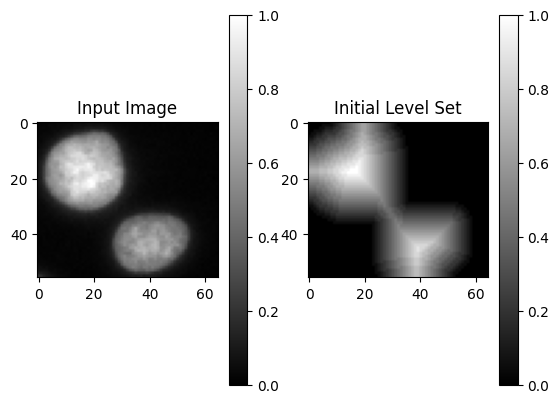

In [3]:

fig, ax = plt.subplots(1,2)
ax[0].set_title('Input Image')
pos = ax[0].imshow(image, 'gray')
fig.colorbar(pos, ax=ax[0])

ax[1].set_title('Initial Level Set')
pos = ax[1].imshow(initial_level_set, 'gray')
fig.colorbar(pos, ax=ax[1])
plt.show()

In [7]:
lambda_value = 1
nu_value = 0.5
epsilon_value=0.1
gs_error=1e-3

In [8]:
force1 = Force1(image, k1=1, k0=1)
segmentator = SplitBregmanGCS(
    force1,
    initial_level_set,
    lambda_value=lambda_value,
    nu_value=nu_value,
    epsilon_value=epsilon_value,
    gs_error=gs_error,
    debug=True)

last_level_set, last_level_set_no_normalized = segmentator.run()

----------------- Iteration error 0.8700236246608009 ------------------------


Gauss Seidel Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Gauss Seidel Iteration:  14%|█▍        | 1391/10000 [00:05<00:33, 256.82it/s]


The solution converged after 1391 iterations
----------------- Iteration error 0.5960847092786635 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1430/10000 [00:05<00:33, 254.19it/s]


The solution converged after 1430 iterations
----------------- Iteration error 0.24477067449473613 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1433/10000 [00:05<00:34, 245.41it/s]


The solution converged after 1433 iterations
----------------- Iteration error 0.1740417505453759 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1432/10000 [00:05<00:35, 241.71it/s]


The solution converged after 1432 iterations
----------------- Iteration error 0.13896163302315606 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1431/10000 [00:06<00:37, 230.17it/s]


The solution converged after 1431 iterations
----------------- Iteration error 0.1211930601843874 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1430/10000 [00:05<00:31, 267.95it/s]


The solution converged after 1430 iterations
----------------- Iteration error 0.12532512809063953 ------------------------


Gauss Seidel Iteration:   2%|▏         | 161/10000 [00:00<00:44, 222.28it/s]

<a list of 11 text.Text objects>

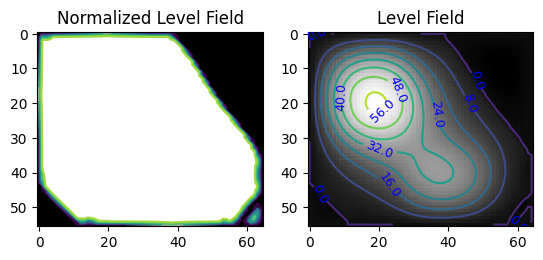

In [6]:
fig, ax = plt.subplots(1,2)
ax[0].set_title('Normalized Level Field')
pos = ax[0].imshow(last_level_set, 'gray')
ax[0].contour(last_level_set)
ax[1].set_title('Level Field')
ax[1].imshow(last_level_set_no_normalized, 'gray')
cs = ax[1].contour(last_level_set_no_normalized)
ax[1].clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)

We don't converge to a level set which values are between 0 and 1

### Try normalization using the first calculated level set max and min


In [ ]:
force1 = Force1(image, k1=1, k0=1)
segmentator = SplitBregmanGCS(
    force1,
    initial_level_set,
    lambda_value=lambda_value,
    nu_value=nu_value,
    epsilon_value=epsilon_value,
    gs_error=gs_error,
    mode=Norma,
    debug=True)

last_level_set, last_level_set_no_normalized = segmentator.run()